# TITLE: VISUALIZING CANCER CASES BY AGE AND GENDER IN AUSTRALIA (2001 - 2019)

***
**Purpose:**
The purpose of this project is to analyze and visualize the trend of Cancer types and occurence in Australia from the year 2001 to 2019
***

## Table of Contents
* [1.0 Introduction](#intro) 
  + [1.0.1 Dataset Source](#Dataset-Source)
* [2.0 Goals and Objectives](#Goals-and-Objectives)
  + [2.0.1 Literature Review](#literature-review)
* [3.0. Loading Libraries and Dataset](#libraries-Dataset)
  + [3.0.1. Loading Libraries](#loading-libraries)
  + [3.0.2. Loading dataset](#loading-dataset)  
* [4.0 Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
  + [4.0.1 Dataset Details](#Dataset-Details)    
  + [4.0.2 Dataset Features](#Dataset-Features)
  + [4.0.3 Target Feature](#Target-Feature)
  + [4.0.4 Data Cleansing](#Data-cleansing)
  + [4.0.5 Random Sampling](#random-sampling)  
* [5.0 Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
   + [5.0.1 Univariate Visualisation](#univariate-visualisation)
       + [5.0.1.1. Distribution of Cancer cases by Age Group](#age-group)
       + [5.0.1.2. Distribution of Cancer cases by Gender](#Gender)
       + [5.0.1.3. Distribution of Cancer cases by Cancer Group](#cancer-group)
   + [5.0.2 Bivariate(Two Variable) Visualisation](#two-variable-visualisation)
       + [5.0.2.1. Relationship Between Sex and Age Group in Cancer Cases](#gender-cases)
       + [5.0.2.2. Distribution of Count of Cancer Cases by Top 10 Cancer Types and Sex (Excluding 'Persons')](#sex-persons)
       + [5.0.2.3. Trend of Cancer Cases over Time](#Cancer-cases)       
   + [5.0.3 Multivariate (Three Variable) visualisation](#three-variable-visualisation)
       + [5.0.3.1. Distribution of Cancer Cases by Age Group Over the Years](#Cancer-age-group)
       + [5.0.3.2. 3-D Scatter Plot of Top 5 Cancer Types by Sex, Age Group and % Proportion](#Cancer-type-group)  
* [6.0 Summary and Conclusion](#Summary-and-Conclusion)
* [7.0 References](#References)

## 1.0. Introduction <a id='intro'></a>

### 1.0.1 Dataset Source <a id='Dataset-Source'></a>

The data source for this assignment is the Cancer incidence by histology from the Australian Institute of Health and Welfare (AIHW). The data resource consists of health and welfare data assets in AIHW’s data repository. It can be gotten from https://www.aihw.gov.au/reports/cancer/cancer-data-in-australia/data?&page=5. The Excel file was converted from `XLSX` to `CSV` before being read for analysis.

## 2.0. Goals and Objectives <a id='Goals-and-Objectives'><a/>

The goal of our analysis is to provide valuable insights into the prevalence of cancer types across different age groups and to understand the distribution of selected cancer cases by histology and gender (sex) from 2001 to 2019. Our analysis aims to contribute to healthcare policies and interventions by identifying prevalent cancer types within specific demographics and providing actionable insights for stakeholders in the healthcare sector.

We would like to perform data cleaning and preprocessing on our dataset. We intend to follow up with carrying out basic descriptive statistics and data visualization plots. This phase of the analysis aims to ensure the integrity and quality of the dataset while providing initial insights into the underlying patterns and trends.

### 2.1. Literature Review <a id='literature-review'><a/>

Cancer poses a significant challenge to public health worldwide, with profound implications for morbidity, mortality, and healthcare expenditure. Feleto et al. (2017) and the Australian Institute of Health and Welfare (AIHW) report in 2021 provide valuable insights into the burden of cancer in Australia. Feleto et al. underscore the prevalence of colorectal cancer and stress the importance of targeted prevention and screening efforts to mitigate its impact. Meanwhile, the AIHW report highlights cancer as a leading cause of illness in Australia and underscores its substantial impact on healthcare expenditure.

Despite Australia's leading position in global cancer survival rates, disparities persist, particularly among individuals residing in rural and remote areas and Indigenous populations (Taylor et al., 2022). These populations experience notably poorer survival outcomes, emphasizing the need for targeted interventions to address disparities in cancer care and outcomes.

Genetic factors play a crucial role in cancer-specific mortality (PCSM), as elucidated by Afshar (2018) and Fitzgerald (2018) in their studies on prostate cancer. Afshar identified genetic variants associated with PCSM, shedding light on the biological pathways modulating tumor aggressiveness. Fitzgerald corroborated these findings, confirming associations between specific genetic variants and PCSM risk. These studies underscore the importance of genetic background in cancer-specific survival and suggest implications for prognostic biomarkers and biological pathways.

To effectively address the complex dynamics of cancer, predictive modeling techniques offer promising avenues for analysis (Feleto et al., 2017). By integrating insights from epidemiological studies, genetic research, and population health reports, researchers can gain a comprehensive understanding of cancer trends. Leveraging machine learning techniques, researchers can develop robust models capable of forecasting cancer occurrence across different demographic groups. This approach holds significant potential for advancing our understanding of cancer epidemiology and guiding targeted prevention and intervention efforts.

In conclusion, a multidimensional approach that integrates epidemiological, genetic, and predictive modeling techniques is essential for comprehensively analyzing and predicting cancer trends in Australia. By elucidating the complex interplay of factors influencing cancer outcomes, researchers can inform evidence-based healthcare policies and interventions to alleviate the burden of cancer on society.

## 3.0. Loading Libraries and Dataset <a id='libraries-Dataset'></a>

### 3.0.1. Loading Libraries  <a id = 'loading-libraries'></a>

In [66]:
# Ignore/supress all warnings
import warnings
warnings.filterwarnings("ignore")

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Ensure inline plotting for Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'png'

# Use a Seaborn style available in Matplotlib
plt.style.use("seaborn-v0_8")

### 3.0.2. Loading dataset  <a id = 'loading-dataset'></a>

In [147]:
import os
import pandas as pd

# Specify the full path to the CSV file
file_path = r"C:\Users\adeyi\Documents\RMIT classes\Machine Learning\Project1\IHMEGDX.csv"

# Read the CSV file into a DataFrame, excluding the first four rows and keeping the first 203375 rows
IHMEGDX = pd.read_csv(file_path, nrows=203375)

In [148]:
# Print the first five rows
IHMEGDX.head()

,Year,Sex,Age group (years),Cancer group,Cancer type,I.D.,Count for cancer type,Proportion (%),Cancer Subtype,Subtype ID,Minor Type,Minor Type ID,Subclass,Subclass ID
0,2001,Males,0–19,Appendiceal cancer,Carcinomas,C2.01,8,10.0%,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,Males,20–39,Appendiceal cancer,Carcinomas,C2.01,20,25.0%,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,Males,40–59,Appendiceal cancer,Carcinomas,C2.01,25,31.3%,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,Males,60–79,Appendiceal cancer,Carcinomas,C2.01,22,27.5%,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,Males,80+,Appendiceal cancer,Carcinomas,C2.01,5,6.3%,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
# Print the last five rows
IHMEGDX.tail()

,Year,Sex,Age group (years),Cancer group,Cancer type,I.D.,Count for cancer type,Proportion (%),Cancer Subtype,Subtype ID,Minor Type,Minor Type ID,Subclass,Subclass ID
203370,2019,Persons,0–19,Rectosigmoid junction cancer,Rectosigmoid junction cancer,NaN,0,0.0%,NaN,NaN,NaN,NaN,NaN,NaN
203371,2019,Persons,20–39,Rectosigmoid junction cancer,Rectosigmoid junction cancer,NaN,43,4.0%,NaN,NaN,NaN,NaN,NaN,NaN
203372,2019,Persons,40–59,Rectosigmoid junction cancer,Rectosigmoid junction cancer,NaN,252,23.2%,NaN,NaN,NaN,NaN,NaN,NaN
203373,2019,Persons,60–79,Rectosigmoid junction cancer,Rectosigmoid junction cancer,NaN,559,51.4%,NaN,NaN,NaN,NaN,NaN,NaN
203374,2019,Persons,80+,Rectosigmoid junction cancer,Rectosigmoid junction cancer,NaN,233,21.4%,NaN,NaN,NaN,NaN,NaN,NaN


## 4.0. Data Cleaning and Preprocessing <a id='Data-Cleaning-and-Preprocessing'><a/>

We cleanse and preprocess our dataset by following the steps below: -
- Reviewing the dataset and identifying the target feature(s)
- Identifying the rows and columns
- Identifying and handling missing values
- Data conversion where necessary
- Renaming Observation (if necessary)
- Checking data consistency
- Dropping duplicates if they exists
- Dropping features/attributes which are not required
- Removing features/attributes which add no value to our analysis

### 4.0.1 Dataset Details <a id = 'Dataset-Details'><a/>

In [151]:
# number of rows and columns in the dataset
print(f"There are {IHMEGDX.shape[0]} rows and {IHMEGDX.shape[1]} attribute/features in this dataset")

There are 203375 rows and 14 attribute/features in this dataset


In [152]:
# descriptive statistics of numerical columns in the dataset
IHMEGDX.describe()

,Year
count,203375.000000
mean,2009.999956
std,5.477216
min,2001.000000
25%,2005.000000
50%,2010.000000
75%,2015.000000
max,2019.000000


In [154]:
# Get information about the dataset
IHMEGDX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203375 entries, 0 to 203374
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Year                   203375 non-null  int64 
 1   Sex                    203375 non-null  object
 2   Age group (years)      203375 non-null  object
 3   Cancer group           203375 non-null  object
 4   Cancer type            203375 non-null  object
 5   I.D.                   197790 non-null  object
 6   Count for cancer type  203375 non-null  object
 7   Proportion (%)         203375 non-null  object
 8   Cancer Subtype         684 non-null     object
 9   Subtype ID             684 non-null     object
 10  Minor Type             684 non-null     object
 11  Minor Type ID          684 non-null     object
 12  Subclass               684 non-null     object
 13  Subclass ID            684 non-null     object
dtypes: int64(1), object(13)
memory usage: 21.7+ MB


In [155]:
#Check for duplicated Data#
IHMEGDX.duplicated().sum()

0

In [156]:
# Number of unique values in the dataset
IHMEGDX.nunique()

Year                       19
Sex                         3
Age group (years)           6
Cancer group               17
Cancer type               267
I.D.                      403
Count for cancer type    4597
Proportion (%)            876
Cancer Subtype              2
Subtype ID                  2
Minor Type                  2
Minor Type ID               2
Subclass                    2
Subclass ID                 2
dtype: int64

In [157]:
#Identifying the datatype of our dataset
print(IHMEGDX.dtypes)

Year                      int64
Sex                      object
Age group (years)        object
Cancer group             object
Cancer type              object
I.D.                     object
Count for cancer type    object
Proportion (%)           object
Cancer Subtype           object
Subtype ID               object
Minor Type               object
Minor Type ID            object
Subclass                 object
Subclass ID              object
dtype: object


### 4.0.2 Dataset Features <a id = 'Dataset-Features'><a/>    

The dataset is a sample from the AIHW report "Cancer Data in Australia 2023," covering cancer cases diagnosed from 2001 to 2019. It includes details such as year, sex, age group, cancer group, type, count, and proportion of cases. Selected cancers like appendiceal, brain, breast, and others are analyzed by histology and sex. The data highlights experimental histology-based cancer diagnoses and the impact of diagnostic advancements on incidence rates.

**Dataset Retrieval**

The dataset was read from the AIHW Portal, we have the following observations
- Number of Observations/record: 203375
- Number of Attributes/features: 10

**Dataset Duplicated**

There are no duplicated record

**Dataset Type**

- The data types include integers (`int64`)and strings (`object`).

**Dataset Observation Description**

The Observation descriptions are listed below:
- Year: The year in which the cancer cases were diagnosed (e.g., 2001).
- Sex: The gender of the individuals diagnosed with cancer (e.g., Males or Females).
- Age group (years): The age group of the individuals diagnosed with cancer (e.g., 0–19, 20–39, etc.).
- Cancer group: The broad category or group of cancer (e.g., Appendiceal cancer).
- Cancer type: The specific type or subtype of cancer within the cancer group (e.g., Carcinomas).
- Count for cancer type: The number of cases diagnosed for the specific cancer type.
- Proportion (%): The proportion of cases for the specific cancer type, expressed as a percentage.
- I.D.: Identification codes or labels associated with the observations.
- I.D. and cancer type: Additional identification codes or labels associated with the observations, often including the cancer type.

### 4.0.3 Target Feature <a id = 'Target-Feature'><a/>

Based on the provided dataset, the target feature is "Count for cancer type".These columns represent the counts or proportions of cancer cases for different cancer types across various demographic groups such as sex, age group, and year.It may serve as a key metric for analyzing cancer trends and patterns over time.

### 4.0.4 Data Cleansing <a id = 'Data-cleansing'><a/>

In [162]:
# Check for any missing values
missing_values = IHMEGDX.isnull().sum()
missing_values

Year                          0
Sex                           0
Age group (years)             0
Cancer group                  0
Cancer type                   0
I.D.                       5585
Count for cancer type      6508
Proportion (%)                0
Cancer Subtype           202691
Subtype ID               202691
Minor Type               202691
Minor Type ID            202691
Subclass                 202691
Subclass ID              202691
dtype: int64

In [163]:
# Convert 'Count for cancer type' column to numeric
IHMEGDX['Count for cancer type'] = pd.to_numeric(IHMEGDX['Count for cancer type'], errors='coerce')

In [164]:
#Identifying the datatype of our dataset
print(IHMEGDX.dtypes)

Year                       int64
Sex                       object
Age group (years)         object
Cancer group              object
Cancer type               object
I.D.                      object
Count for cancer type    float64
Proportion (%)            object
Cancer Subtype            object
Subtype ID                object
Minor Type                object
Minor Type ID             object
Subclass                  object
Subclass ID               object
dtype: object


From the provided dataset, columns "I.D.", "Unnamed: 7" and "I.D. and cancer type" are redundant. They serve as identifiers/labels for what we can already get from the column "Cancer Type". We can also see that we do not have any missing dataset. Also we take out every occurence where "All age combined" appears in the "Age Group (Years)" and "Persons" appear in the "Sex" feature/observation. 

`Count for Cancer type` and `Proportion (%)` have been converted from `object` to `float64` for the analysis we intend to carry out

In [165]:
# Drop any redundant columns
IHMEGDX = IHMEGDX.drop(columns=["I.D.", "Cancer Subtype", "Proportion (%)", "Minor Type", "Subclass", "Subtype ID", "Minor Type ID", "Subclass ID"])

In [166]:
IHMEGDX

,Year,Sex,Age group (years),Cancer group,Cancer type,Count for cancer type
0,2001,Males,0–19,Appendiceal cancer,Carcinomas,8.0
1,2001,Males,20–39,Appendiceal cancer,Carcinomas,20.0
2,2001,Males,40–59,Appendiceal cancer,Carcinomas,25.0
3,2001,Males,60–79,Appendiceal cancer,Carcinomas,22.0
4,2001,Males,80+,Appendiceal cancer,Carcinomas,5.0
...,...,...,...,...,...,...
203370,2019,Persons,0–19,Rectosigmoid junction cancer,Rectosigmoid junction cancer,0.0
203371,2019,Persons,20–39,Rectosigmoid junction cancer,Rectosigmoid junction cancer,43.0
203372,2019,Persons,40–59,Rectosigmoid junction cancer,Rectosigmoid junction cancer,252.0
203373,2019,Persons,60–79,Rectosigmoid junction cancer,Rectosigmoid junction cancer,559.0


In [167]:
# Drop rows where Age Group is "All ages combined" and Sex is "Persons"
IHMEGDX = IHMEGDX[(IHMEGDX['Age group (years)'] != 'All ages combined') & (IHMEGDX['Sex'] != 'Persons')].copy()

We also drop where age group (years) has the occurence of `All ages combined` as it distorts our read. we also removed `Persons` from our `Sex` record

In [168]:
# Count missing values in each column
print(f"\nNumber of missing values for each column/ feature:")
print(IHMEGDX.isnull().sum())


Number of missing values for each column/ feature:
Year                        0
Sex                         0
Age group (years)           0
Cancer group                0
Cancer type                 0
Count for cancer type    2000
dtype: int64


In [169]:
# Using Imputation method to address missing values in the count for Cancer type column
mean_count = IHMEGDX['Count for cancer type'].mean()
IHMEGDX['Count for cancer type'].fillna(mean_count, inplace=True)

In [172]:
# Confirm if missing values exists in each column
print(f"\nNumber of missing values for each column/ feature:")
print(IHMEGDX.isnull().sum())


Number of missing values for each column/ feature:
Year                     0
Sex                      0
Age group (years)        0
Cancer group             0
Cancer type              0
Count for cancer type    0
dtype: int64


In [173]:
IHMEGDX

,Year,Sex,Age group (years),Cancer group,Cancer type,Count for cancer type
0,2001,Males,0–19,Appendiceal cancer,Carcinomas,8.0
1,2001,Males,20–39,Appendiceal cancer,Carcinomas,20.0
2,2001,Males,40–59,Appendiceal cancer,Carcinomas,25.0
3,2001,Males,60–79,Appendiceal cancer,Carcinomas,22.0
4,2001,Males,80+,Appendiceal cancer,Carcinomas,5.0
...,...,...,...,...,...,...
203364,2019,Females,0–19,Rectosigmoid junction cancer,Rectosigmoid junction cancer,0.0
203365,2019,Females,20–39,Rectosigmoid junction cancer,Rectosigmoid junction cancer,24.0
203366,2019,Females,40–59,Rectosigmoid junction cancer,Rectosigmoid junction cancer,106.0
203367,2019,Females,60–79,Rectosigmoid junction cancer,Rectosigmoid junction cancer,200.0


From the provided dataset, after cleansing, we are reduced to 111,055 rows and 6 columns.

### 4.0.5 Random Sampling <a id = 'random-sampling'><a/>

In [174]:
# Specifying the desired sample size (20% of the total dataset)
sample_size = int(0.2 * len(IHMEGDX))

# Perform random sampling
IHMEGDX_sample = IHMEGDX.sample(n=sample_size, random_state=42)  # Set random_state for reproducibility

# Display the sampled data
IHMEGDX_sample

,Year,Sex,Age group (years),Cancer group,Cancer type,Count for cancer type
46330,2014,Females,80+,Cervical cancer,Neuroendocrine neoplasms,0.0
126290,2006,Males,40–59,Lung cancer,"Squamous cell carcinoma, NOS",114.0
199618,2001,Males,80+,Rectosigmoid junction cancer,Mucin-producing adenocarcinoma,1.0
117705,2004,Males,60–79,Liver cancer,Other cancers,0.0
72063,2014,Females,60–79,Colorectal cancer,"Papillary adenocarcinoma, NOS",2.0
...,...,...,...,...,...,...
35821,2015,Males,20–39,Breast cancer,Adenoid cystic carcinoma,0.0
97800,2019,Females,0–19,Colorectal cancer (excluding appendix),Mixed adenoneuroendocrine carcinoma,0.0
90711,2005,Females,60–79,Colorectal cancer (excluding appendix),Adenocarcinoma in villous adenoma,46.0
89810,2012,Females,40–59,Colorectal cancer (excluding appendix),Adenocarcinoma in multiple adenomatous polyps,0.0


## 5.0 Data Exploration and Visualisation <a id='Data-Exploration-and-Visualisation'><a/> 
Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

### 5.0.1. Univariate Visualisation <a id='univariate-visualisation'></a>

#### 5.0.1.1. Distribution of Cancer cases by Age Group <a id='age-group'></a>

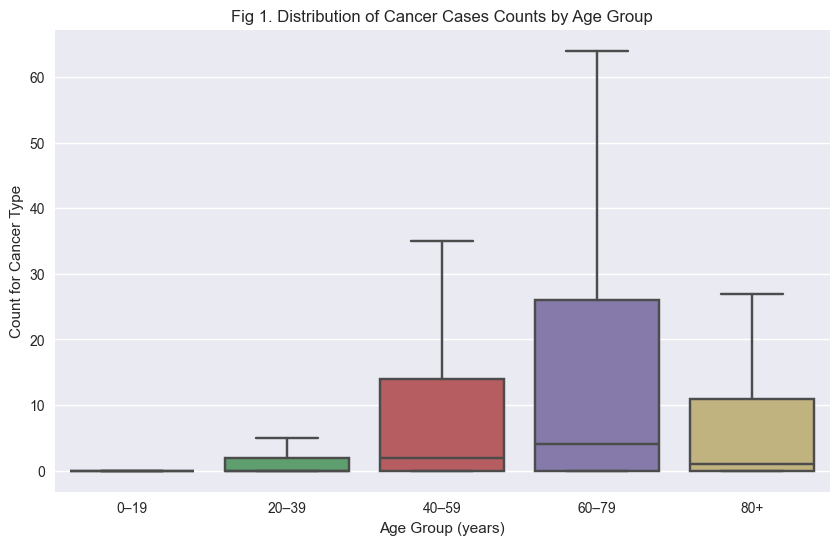

In [175]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(data=IHMEGDX, x='Age group (years)', y='Count for cancer type', showfliers=False)

# Set the title and labels
plt.title('Fig 1. Distribution of Cancer Cases Counts by Age Group')
plt.xlabel('Age Group (years)')
plt.ylabel('Count for Cancer Type')

# Show the plot
plt.show()

Fig. 1 shows a boxplot of the distribution of Age group (years) by the count of cancer type. From our Boxplot, we can see a predominance in the prevalence of cancer for people within the age bracket of 60 - 79 years of age. 

#### 5.0.1.2. Distribution of Cancer cases by Gender <a id='Gender'></a>

In [176]:
# Group the data by 'Sex' and sum the counts for each gender
df_gender_distribution = IHMEGDX.groupby('Sex')['Count for cancer type'].sum().reset_index()

# Plotting the bar plot
fig = px.bar(df_gender_distribution, x='Sex', y='Count for cancer type',
             title='Fig 2. Distribution of Cancer Cases by Gender',
             labels={'Sex': 'Gender', 'Count for cancer type': 'Count of Cancer Cases'},
             color='Sex',
             color_discrete_sequence=['#636EFA', '#EF553B'])  # Custom colors for male and female

# Remove the legend
fig.update_layout(showlegend=False)


fig.show()

Fig. 2 shows the distribution of cancer cases by gender. From our visualisation above, we can see that it is evenly split with a slight edge from Females (1.442 million) tending to have more cases of cancer than Males (1.439 million).

#### 5.0.1.3. Distribution of Cancer cases by Cancer Group <a id='cancer-group'></a>

In [177]:
# Group the data by 'Cancer group' and sum the counts for each group
df_cancer_group_distribution = IHMEGDX.groupby('Cancer group')['Count for cancer type'].sum().reset_index()

# Sort the dataframe by count in ascending order
df_cancer_group_distribution = df_cancer_group_distribution.sort_values(by='Count for cancer type')

# Plotting the bar plot
fig = px.bar(df_cancer_group_distribution, x='Cancer group', y='Count for cancer type',
             title='Fig 3. Distribution of Cancer Cases by Cancer Group (Ascending Order)',
             labels={'Count for cancer type': 'Count of Cancer Cases', 'Cancer group': 'Cancer Group'},
             color='Cancer group',
             color_discrete_sequence=px.colors.qualitative.Set3)

# Remove the legend
fig.update_layout(showlegend=False)

# Increase visualization size
fig.update_layout(width=1000, height=600)

fig.show()

Fig. 3 shows the count of cases for each cancer group with Lung Cancer showing the largest count (453k)

### 5.0.2. Bivariate (Two Variable) Visualisation <a id='two-variable-visualisation' ><a/>

#### 5.0.2.1. Relationship Between Sex and Age Group in Cancer Cases <a id='gender-cases'></a>

In [178]:
# Filter out rows where 'Sex' is not available or is not specified
df_filtered = IHMEGDX.dropna(subset=['Sex'])

# Group the data by 'Sex' and 'Age group (years)' and sum the counts for each group
df_sex_age_group = df_filtered.groupby(['Sex', 'Age group (years)'])['Count for cancer type'].sum().reset_index()

# Plotting the bar chart
fig = px.bar(df_sex_age_group, 
             x='Age group (years)', 
             y='Count for cancer type', 
             color='Sex', 
             barmode='group',
             title='Fig 4.1. Relationship Between Sex and Age Group in Cancer Cases',
             labels={'Age group (years)': 'Age Group', 'Count for cancer type': 'Count of Cancer Cases', 'Sex': 'Sex'})

fig.show()

From our bar chart, we can see that males and female within the age bracket of 60 - 79 years of age have high count of cancer cases. versus other age groups.

In [138]:
# Group the data by 'Sex' and 'Age group (years)' and sum the counts for each group
df_sex_age_group = IHMEGDX.groupby(['Sex', 'Age group (years)'])['Count for cancer type'].sum().reset_index()

# Pivot the dataframe to have 'Sex' as rows, 'Age group (years)' as columns, and 'Count for cancer type' as values
df_pivot = df_sex_age_group.pivot(index='Sex', columns='Age group (years)', values='Count for cancer type')

# Plotting the heatmap
fig = px.imshow(df_pivot,
                labels=dict(x="Age Group", y="Sex", color="Count of Cancer Cases"),
                x=df_pivot.columns,
                y=df_pivot.index,
                title='Fig. 4.2. Relationship Between Sex and Age Group in Cancer Cases (Heatmap)',
                color_continuous_scale='viridis')

fig.show()

Fig. 4.1. shows the relationship between gender and age group with a tendency for more occurences of cancer for both female and male between the ages of 60 - 79 years of age. Only in 0-19 and 20 -39 can we see that there is a tendency for females to have a higher report of cancer cases than males,  Fig. 4.2 expresses the same chart as a Heatmap 

#### 5.0.2.2. Distribution of Count of Cancer Cases by Top 10 Cancer Types and Sex <a id='sex-persons'></a>

In [179]:
# Get the top 10 most frequent cancer types
top_10_cancer_types = IHMEGDX['Cancer type'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 cancer types
df_top_10 = IHMEGDX[IHMEGDX['Cancer type'].isin(top_10_cancer_types)]

# Group the data by 'Cancer type' and 'Sex' and sum the counts for each group
df_cancer_sex = df_top_10.groupby(['Cancer type', 'Sex'])['Count for cancer type'].sum().reset_index()

# Sort the DataFrame by 'Count for cancer type' in ascending order
df_cancer_sex_sorted = df_cancer_sex.sort_values(by='Count for cancer type', ascending=True)

# Plotting the grouped bar chart
fig = px.bar(df_cancer_sex_sorted, 
             x='Cancer type', 
             y='Count for cancer type', 
             color='Sex', 
             barmode='group',
             title='Fig. 5. Distribution of Count of Cancer Cases by Top 10 Cancer Types and Gender',
             labels={'Cancer type': 'Cancer Type', 'Count for cancer type': 'Count of Cancer Cases', 'Sex': 'Sex'})

fig.show()

The visualization above (Fig. 5) is bivariate because it represents the relationship between two variables: "Cancer type" and "Sex", with the count of cancer cases as the dependent variable. The highest level of cancer cases reported for both gender was `Carcinomas`

#### 5.0.2.3. Trend of Cancer Cases over Time <a id='Cancer-cases'></a>

In [180]:
# Group by Year and sum the counts
df_yearly_cases = IHMEGDX.groupby('Year').sum().reset_index()

# plot visualisation
fig = px.bar(df_yearly_cases, x='Year', y='Count for cancer type',
             title='Fig. 6. Trend of Cancer Cases Over Time',
             labels={'Year': 'Year', 'Count for cancer type': 'Count of Cancer Cases'},
             color_discrete_sequence=['red'])

fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)

# Adding a trend line
fig.add_scatter(x=df_yearly_cases['Year'], y=df_yearly_cases['Count for cancer type'],
                mode='lines', name='Trend', line=dict(color='green', width=3))

fig.show()

Fig. 6 shows the progressive increase of cancer cases over time from 2001 up until 2019. This validates our assertion in our Literature review. 

### 5.0.3. Multivariate (Three Variable) Visualisation <a id ='three-variable-visualisation' ></a>

#### 5.0.3.1. "Distribution of Cancer Cases by Age Group Over the Years <a id='Cancer-age-group'></a>

In [181]:
# Group the data by 'Year' and 'Age group (years)' and sum the counts for each group
df_age_over_years = IHMEGDX.groupby(['Year', 'Age group (years)'])['Count for cancer type'].sum().reset_index()

# Plotting the line chart
fig = px.line(df_age_over_years, 
              x='Year', 
              y='Count for cancer type', 
              color='Age group (years)', 
              title='Fig. 7.1. Distribution of Cancer Cases by Age Group Over the Years',
              labels={'Year': 'Year', 'Count for cancer type': 'Count of Cancer Cases', 'Age group (years)': 'Age Group'})

fig.show()

In [142]:
# Group by Year and Age group and sum the counts
df_age_group_year = IHMEGDX.groupby(['Year', 'Age group (years)']).sum().reset_index()

# plot visualisation
fig = px.bar(df_age_group_year, x='Year', y='Count for cancer type', 
             color='Age group (years)',
             title='Fig. 7.2. Distribution of Cancer Cases by Age Group Over the Years',
             labels={'Year': 'Year', 'Count for cancer type': 'Count of Cancer Cases', 'Age group (years)': 'Age Group'},
             color_discrete_sequence=px.colors.qualitative.Set3,
             barmode='stack')

fig.show()

In [182]:
# Calculate the percentage change in cancer cases for each age group over the years
df_growth_rate = df_age_over_years.pivot(index='Year', columns='Age group (years)', values='Count for cancer type').pct_change() * 100

# Plotting the line chart
fig = px.line(df_growth_rate, 
              x=df_growth_rate.index, 
              y=df_growth_rate.columns,
              title='Fig 7.3. Growth Rate of Cancer Cases by Age Group (2001-2019)',
              labels={'index': 'Year', 'value': 'Growth Rate (%)', 'variable': 'Age Group'})

fig.show()

Fig. 7.1, 7.2 and 7.3 we can see a progressive growth in the distribution of cancer cases by age group over the years (2001 - 2019). However, looking at Fig. 7.3. we can observe that there is a wide swing which requires further investigation in 2007 - 2010 and 2012 to 2014. All the other age group follow a band range of 7 to - 4% from 2001 to 2019.

#### 5.0.3.2. 3-D Scatter Plot of Top 5 Cancer Types by Sex, Age Group <a id='Cancer-type-group'></a>

In [183]:
# Get the top 5 most frequent cancer types
top_5_cancer_types = IHMEGDX['Cancer type'].value_counts().nlargest(5).index

# Filter the dataframe to include only the top 5 cancer types
df_top_5 = IHMEGDX[IHMEGDX['Cancer type'].isin(top_5_cancer_types)]

# Remove rows with NaN values in the 'Count for cancer type' column
df_top_5_cleaned = df_top_5.dropna(subset=['Count for cancer type'])

# Create a 3D scatter plot
fig = px.scatter_3d(df_top_5_cleaned, 
                    x='Age group (years)', 
                    y='Cancer type', 
                    z='Count for cancer type', 
                    color='Cancer type',
                    size='Count for cancer type',  # Adjust the size based on count
                    title='Fig. 8. 3D Scatter Plot of Top 5 Cancer Types by Age Group and Count',
                    labels={'Age group (years)': 'Age Group', 
                            'Cancer type': 'Cancer Type', 
                            'Count for cancer type': 'Count of Cancer Cases'})

# Increase chart size
fig.update_layout(width=1000, height=800)

# Show the plot
fig.show()

## 6.0. Summary and Conclusion <a id= 'Summary-and-Conclusion'><a/>

The analysis of the IHMEGDX dataset yields significant insights into the distribution of cancer cases across various demographic factors including sex, age group, and cancer type. Through meticulous data cleaning, preprocessing, and visualization techniques, we obtained a comprehensive understanding of the dataset.

Initially, we conducted data cleaning to enhance the dataset's suitability for analysis. This involved removing redundant variables such as "ID" and "I.D. and cancer type", which could be adequately represented by the "Cancer Type" column. We also addressed missing values and outliers. Subsequently, we performed random sampling, selecting 20% of the dataset to streamline computational resources while preserving data integrity, in preparation for subsequent predictive analytics tasks.

During exploratory data analysis, we visualized the distribution of cancer cases across different demographic categories. Notably, we observed that the 60-79 age group accounted for a higher prevalence among the genders. From our visualisation above, we can see that Females (1.49 million) tend to suffer more from cancer than Males (1.41 million). We identified the Top 10 Cancer group with Lung cancer showing the largest count. However, for the top 10 most frequent cancer types, Carcinomas exhibited the highest occurrence, among both gender. Additionally, we noted a consistent increase in reported cancer cases year on year.

Our visualizations revealed demographic groups that may be more susceptible to specific cancer types, emphasizing the importance of factors such as age group and sex in determining cancer prevalence. Furthermore, we observed temporal trends and regional variations in cancer case distribution.

This analysis underscores the significance of certain features, such as cancer type and age group, in understanding cancer prevalence. The insights gleaned from this dataset can inform healthcare professionals, policymakers, and researchers in developing targeted interventions and strategies to address cancer-related challenges.

In conclusion, the IHMEGDX dataset analysis offers valuable insights into cancer distribution by demographic factors, laying the groundwork for further research and analysis in the field of oncology.

## 7.0. References <a id ='References'></a>

+ Afshar N, English DR, Thursfield V, Mitchell PL, Te Marvelde L, Farrugia H, Giles GG and Milne RL (2018) ‘Differences in cancer survival by sex: a population-based study using cancer registry data’, Cancer Causes & Control, 29(11):1059–1069, doi:https://doi.org/10.1007/s10552-018-1079-z

- Australian Institute of Health and Welfare (2021) Cancer in Australia 2021, https://www.aihw.gov.au/getmedia/0ea708eb-dd6e-4499-9080-1cc7b5990e64/aihw-can-144.pdf.aspx?inline=true.

+ Cancer data in Australia, Data (2023) Australian Institute of Health and Welfare, https://www.aihw.gov.au/reports/cancer/cancer-data-in-australia/data?&page=5, accessed 18 April 2024.

- Feletto E, Lew J-B, Worthington J, He E, Caruana M, Butler K, Hui H, Taylor N, Banks E, Barclay K, Broun K, Butt A, Carter R, Cuff J, Dessaix A, Ee H, Emery J, Frayling IM, Grogan P and Holden C (2020) ‘Pathways to a cancer-free future: a protocol for modelled evaluations to minimise the future burden of colorectal cancer in Australia’, BMJ Open, 10(6):e036475, doi:https://doi.org/10.1136/bmjopen-2019-036475.

+ FitzGerald LM, Zhao S, Leonardson A, Geybels MS, Kolb S, Lin DW, Wright JL, Eeles R, Kote-Jarai Z, Govindasami K, Giles GG, Southey MC, Schleutker J, Tammela TL, Sipeky C, Penney KL, Stampfer MJ, Gronberg H, Wiklund F and Stattin P (2018) ‘Germline variants in IL4, MGMT and AKT1 are associated with prostate cancer-specific mortality: An analysis of 12,082 prostate cancer cases’, Prostate Cancer and Prostatic Diseases, 21(2):228–237, doi:https://doi.org/10.1038/s41391-017-0029-2.

- stats_tutorials/Phase1_Report_Sample.ipynb at 4af224d06737542b1fe1501b783a220dfa9db1ab · akmand/stats_tutorials (n.d.) GitHub, https://github.com/akmand/stats_tutorials/blob/4af224d06737542b1fe1501b783a220dfa9db1ab/Phase1_Report_Sample.ipynb, accessed 11 April 2024.

+ Taylor EV, Thackrah RD and Thompson SC (2022) ‘Improving Access to Cancer Treatment Services in Australia’s Northern Territory—History and Progress’, International Journal of Environmental Research and Public Health, 19(13):7705, doi:https://doi.org/10.3390/ijerph19137705.